# Tratamiento de variables categóricas

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("F:\BD\GitHub\mlearningcourse\datasets\ecom-expense\Ecom Expense.csv")

In [3]:
df.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485


### Creación de variables dummy

In [4]:
#Género & City Tier
dummy_gender = pd.get_dummies(df['Gender'], prefix = 'Gender')
dummy_city_tier = pd.get_dummies(df['City Tier'], prefix = 'City')

In [5]:
# Dummy de género
dummy_gender.head()

,Gender_Female,Gender_Male
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [6]:
# Dummy de City Tier
dummy_city_tier.head()

,City_Tier 1,City_Tier 2,City_Tier 3
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0


### Concatener columnas (Join)

In [7]:
column_names = df.columns.values.tolist()
column_names

['Transaction ID',
 'Age ',
 ' Items ',
 'Monthly Income',
 'Transaction Time',
 'Record',
 'Gender',
 'City Tier',
 'Total Spend']

In [8]:
# Hacer un join entre el DF original y el df con las nuevas columnas
df_new = df.join(dummy_gender)

# Listar nombre de las columnas del nuevo dataframe
column_names = df_new.columns.values.tolist()

df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0


In [9]:
# Reasignar dataframe de (join) dataframe City Tier
df_new = df_new[column_names].join(dummy_city_tier)
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0


### Construcción del modelo predictor (regresión lineal)

In [10]:
# Selección de variables predictoras
feature_cols = ['Monthly Income', 'Transaction Time', 
                'Gender_Female', 'Gender_Male', 'City_Tier 1', 
                'City_Tier 2', 'City_Tier 3', 'Record'
               ]

In [11]:
# Establecimiento de variables
X = df_new[feature_cols]   # Variables predictoras
Y = df_new['Total Spend']  # Variable a predecir

In [12]:
# Regresión lineal

lm = LinearRegression()
lm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
# Intercepto y coeficientes
print('Intercepto: ', lm.intercept_)
print('Coeficientes')
print(lm.coef_)

Intercepto:  -79.4171303013718
Coeficientes
[ 1.47538980e-01  1.54946125e-01 -1.31025013e+02  1.31025013e+02
  7.67643260e+01  5.51389743e+01 -1.31903300e+02  7.72233446e+02]


In [14]:
# Unir en una lista (se utiliza método ZIP)
list(zip (feature_cols, lm.coef_))

[('Monthly Income', 0.14753898049205738),
 ('Transaction Time', 0.15494612549589634),
 ('Gender_Female', -131.02501325554624),
 ('Gender_Male', 131.02501325554607),
 ('City_Tier 1', 76.76432601049513),
 ('City_Tier 2', 55.1389743092325),
 ('City_Tier 3', -131.9033003197277),
 ('Record', 772.2334457445645)]

In [15]:
# Revisión de R 2
print('R2 = ', lm.score(X,Y))

R2 =  0.9179923586131016


* El modelo puede ser escrito como:

  * Total_Spend = -79.4171303013718 +'Monthly Income' * 0.14753898049205738 + 'Transaction Time' * 0.15494612549589634 + 'Gender_Female' * -131.02501325554624 + 'City_Tier 1' * 76.76432601049513 +'City_Tier 2' * 55.1389743092325 +'City_Tier 3'* -131.9033003197277 +  'Record' * 772.2334457445645

### Predicción

In [16]:
df_new['prediction_Spend'] = (-79.4171303013718) + (df_new['Monthly Income'] * 0.14753898049205738) + (df_new['Transaction Time'] * 0.15494612549589634) + (df_new['Gender_Female'] * -131.02501325554624) + (df_new['City_Tier 1'] * 76.76432601049513) + (df_new['City_Tier 2'] * 55.1389743092325) + (df_new['City_Tier 3'] * -131.9033003197277) + (df_new['Record'] * 772.2334457445645)

In [17]:
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3,prediction_Spend
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0,4903.696720
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0,4799.434826
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0,5026.057491
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0,8068.012996
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0,3581.980335


In [18]:
# Suma cuadrado de las diferencias
SSD = np.sum(((df_new["prediction_Spend"]) - (df_new["Total Spend"]))**2)
SSD

1538335050.2591367

In [19]:
# Suma de los errores de las diferencias
RSE = np.sqrt(SSD/len(df_new)-len(feature_cols)-1)
RSE  # Gastarás 807 más u 807 menos sobre el promedio (6163.17)

807.0166970424514

In [20]:
sales_mean = np.mean(df_new['Total Spend'])
sales_mean

6163.176415976714

In [21]:
error = RSE / sales_mean
error * 100   # Porcentaje de datos que no explica el modelo

13.094168373153062


El modelo puede ser escrito como:

Total_Spend = -79.41713030137362 + 'Monthly Income' 0.14753898049205738 + 'Transaction Time' 0.15494612549589545+'Gender_Female' -131.02501325554567 + 'Gender_Male' 131.0250132555456+'City_Tier 1' 76.76432601049527 + 'City_Tier 2' 55.138974309232474 + 'City_Tier 3' -131.9033003197278+'Record' 772.2334457445648

* Si es hombre y vive en CT1: Total_Spend = 128.37220896466724 + 'Monthly Income' 0.14753898049205738 + 'Transaction Time' 0.15494612549589545+'Record'* 772.2334457445648
* Si es hombre y vive en CT2: Total_Spend = 106.74685726340445 + 'Monthly Income' 0.14753898049205738 + 'Transaction Time' 0.15494612549589545 +'Record'* 772.2334457445648
* Si es hombre y vive en CT3: Total_Spend = -80.29541736555583 + 'Monthly Income' 0.14753898049205738 + 'Transaction Time' 0.15494612549589545+'Record'* 772.2334457445648
* Si es mujer y vive en CT1: Total_Spend = -79.41713030137362 + 'Monthly Income' 0.14753898049205738 + 'Transaction Time' 0.15494612549589545 - 131.0250132555456+ 76.76432601049527 +'Record'* 772.2334457445648
* Si es mujer y vive en CT2: Total_Spend = -79.41713030137362 + 'Monthly Income' 0.14753898049205738 + 'Transaction Time' 0.15494612549589545 - 131.0250132555456+ 55.138974309232474 +'Record'* 772.2334457445648
* Si es mujer y vive en CT3: Total_Spend = -79.41713030137362 + 'Monthly Income' 0.14753898049205738 + 'Transaction Time' 0.15494612549589545 - 131.0250132555456-131.9033003197278 +'Record'* 772.2334457445648

## Eliminar variables dummy redundantes [modelo simplificado]

In [24]:
dummy_gender = pd.get_dummies(df['Gender'], prefix = 'Gender').iloc[:,1:]
dummy_gender.head()

,Gender_Male
0,0
1,0
2,1
3,0
4,0


In [27]:
dummy_city_tier = pd.get_dummies(df['City Tier'], prefix= 'City').iloc[:,1:]
dummy_city_tier.head()

,City_Tier 2,City_Tier 3
0,0,0
1,1,0
2,1,0
3,0,0
4,1,0


In [29]:
column_names = df.columns.values.tolist()
df_new = df[column_names].join(dummy_gender)
column_names = df_new.columns.values.tolist()
df_new = df_new[column_names].join(dummy_city_tier)
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Male,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,0,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,1,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,0,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,0,1,0


In [31]:
feature_cols = ['Monthly Income', 'Transaction Time', 'Gender_Male', 'City_Tier 2', 'City_Tier 3', 'Record']
X = df_new[feature_cols]
Y = df_new['Total Spend']
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [32]:
print(lm.intercept_)

-133.67781754642238


In [33]:
list(zip(feature_cols, lm.coef_))

[('Monthly Income', 0.14753898049205744),
 ('Transaction Time', 0.1549461254959002),
 ('Gender_Male', 262.0500265110948),
 ('City_Tier 2', -21.62535170126276),
 ('City_Tier 3', -208.66762633022296),
 ('Record', 772.2334457445636)]

In [34]:
lm.score(X,Y)

0.9179923586131016

Coeficientes con todas las variables en el modelo

* [('Monthly Income', 0.14753898049205738),
* ('Transaction Time', 0.15494612549589634),
* ('Gender_Female', -131.02501325554624),
*('Gender_Male', 131.02501325554607),
 * ('City_Tier 1', 76.76432601049513),
 * 'City_Tier 2', 55.1389743092325),
 * 'City_Tier 3', -131.9033003197277),
 * 'Record', 772.2334457445645)]
 
 
Coeficientes tras enmascarar las variables dummy pertinentes

* ('Monthly Income', 0.14753898049205744),
 * 'Transaction Time', 0.1549461254959002),
 * 'Gender_Male', 262.0500265110948),
 * 'City_Tier 2', -21.62535170126276),
 * 'City_Tier 3', -208.66762633022296),
 * 'Record', 772.2334457445636)]
 
 
 * Los cambios se reflejan en :
 * Gender_Male:  antes ..> 131.02, despues 262.05 = ((131.02) - (-131.02))
 * Gedner_Female:  antes --> 131.02, después --> 0
 * Ct1   antes 76.76 despues 0
 * Ct2   antes 55.13 despues 21.62 (55.13 -76.76)
 * Ct3   antes 131.90 despues 208.66 (-131.90 -76.76)

# Transformación de variables para conseguir una relación no lineal

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
data_auto = pd.read_csv(r'F:\BD\GitHub\mlearningcourse\datasets\auto\auto-mpg.csv')

In [38]:
data_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [39]:
data_auto.shape

(406, 9)

Text(0.5, 1.0, 'CV vs MPG')

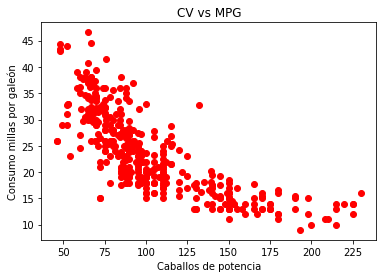

In [44]:
%matplotlib inline
#Eliminar NA

data_auto['mpg'] = data_auto['mpg'].dropna()
data_auto['horsepower'] = data_auto['horsepower'].dropna()
plt.plot(data_auto['horsepower'], data_auto['mpg'], 'ro')
plt.xlabel('Caballos de potencia')
plt.ylabel('Consumo millas por galeón')
plt.title('CV vs MPG')

### Modelo de regresión lineal
   
   * mpg = a + b * horsepower

In [61]:
X = data_auto['horsepower'].fillna(data_auto['horsepower'].mean())
Y = data_auto['mpg'].fillna(data_auto['mpg'].mean())
X_data = X[:,np.newaxis]

In [62]:
lm = LinearRegression()
lm.fit(X_data,Y)  #cambiar a array

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [63]:
type(X_data)

numpy.ndarray

In [66]:
type(X_data)

numpy.ndarray

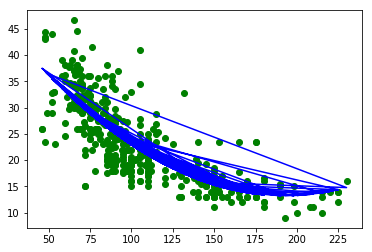

In [104]:
%matplotlib inline
plt.plot(X,Y, 'ro', color = 'green')
plt.plot(X, lm.predict(X_data), color = 'blue')

In [69]:
# R2
lm.score(X_data, Y)

0.574653340645025

In [72]:
# Suma cuadrados desviaciones

SSD = np.sum((Y-lm.predict(X_data))**2)
RSE = np.sqrt(SSD/(len(X_data) -1))
y_mean = np.mean(Y)
error = RSE / y_mean
SSD, RSE, y_mean, error

(10315.75196006092, 5.046879480825511, 23.51457286432162, 0.21462773361633458)

# Modelo de regresión cuadrático
   * mpg = a + b * horsepower ^ 2

In [73]:
X_data = X **2
X_data = X_data[:,np.newaxis]

In [74]:
lm = LinearRegression()
lm.fit(X_data, Y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [76]:
lm.score(X_data, Y)

0.4849887034823205

In [77]:

SSD = np.sum((Y-lm.predict(X_data))**2)
RSE = np.sqrt(SSD/(len(X_data) -1))
y_mean = np.mean(Y)
error = RSE / y_mean
SSD, RSE, y_mean, error

(12490.350340501926, 5.553410772769817, 23.51457286432162, 0.236168898529981)

## Modelo de regresión lineal y cuadrático
  * mpg = a + b horsepower + c horsepower ^2

In [78]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [79]:
poly = PolynomialFeatures(degree = 2)

In [80]:
X_data = poly.fit_transform(X[:,np.newaxis])

In [82]:
lm = linear_model.LinearRegression()
lm.fit(X_data, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [84]:
lm.score(X_data, Y)

0.6439066584257469

In [85]:
lm.intercept_

55.02619244708036

In [86]:
lm.coef_

array([ 0.        , -0.43404318,  0.00112615])

### Modelo

* 55.026 - 0.434 * hp + 0.00112615 * hp^2

In [113]:
# Correr regresión con grados del 2 al 6
for d in range(2,5):
    poly = PolynomialFeatures(degree = d)
    X_data = poly.fit_transform(X[:,np.newaxis])
    lm = linear_model.LinearRegression()
    lm.fit(X_data, Y)
    print('\n\nRegresion de grado' + str(d))
    print(lm.score(X_data, Y))
    print(lm.intercept_)
    print(lm.coef_)



Regresion de grado2
0.6439066584257469
55.02619244708036
[ 0.         -0.43404318  0.00112615]


Regresion de grado3
0.6444678885560744
58.44877411191831
[ 0.00000000e+00 -5.27113167e-01  1.89736722e-03 -1.95723195e-06]


Regresion de grado4
0.6467674189704502
40.096643848138505
[ 0.00000000e+00  1.62563541e-01 -7.10892744e-03  4.65580255e-05
 -9.15840093e-08]


In [117]:
# import matplotlib.pyplot as plt
# from random import randint
# import numpy as np

# #Let's generate some random X, Y data X = [ [frst group],[second group] ...]
# X = [ [randint(0,50) for i in range(0,5)] for i in range(0,24)]
# Y = [ [randint(0,50) for i in range(0,5)] for i in range(0,24)]
# labels = range(1,len(X)+1)

# fig = plt.figure()
# ax = fig.add_subplot(111)
# for x,y,lab in zip(X,Y,labels):
#         ax.scatter(x,y,label=lab)

# colormap = plt.cm.gist_ncar #nipy_spectral, Set1,Paired  
# colorst = [colormap(i) for i in np.linspace(0, 0.9,len(ax.collections))]       
# for t,j1 in enumerate(ax.collections):
#     j1.set_color(colorst[t])


# ax.legend(fontsize='small')